<a href="https://colab.research.google.com/github/jerrycho1212/deep-learn/blob/main/Tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import sys
import networkx as nx 
import matplotlib.pyplot as plt

%matplotlib inline

print(f"Python version {sys.version}")
print(f"networkx version: {nx.__version__}")


Python version 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
networkx version: 2.6.3


In [2]:
#Let's import the ZKC graph:
ZKC_graph = nx.karate_club_graph()

#Let's keep track of which nodes represent John A and Mr Hi
Mr_Hi = 0
John_A = 33

#Let's display the labels of which club each member ended up joining
club_labels = nx.get_node_attributes(ZKC_graph,'club')

#just show a couple of the labels
print({key:club_labels[key] for key in range(10,16)})

{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer'}


In [3]:
A = nx.convert_matrix.to_numpy_matrix(ZKC_graph)

A

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

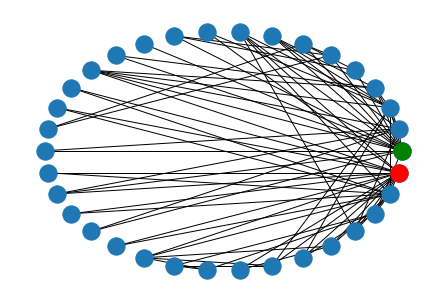

In [4]:
#To plot using networkx we first need to get the positions we want for each node. 
#Here we will use a ciruclar layout but there are many other variations you could choose!
circ_pos = nx.circular_layout(ZKC_graph) 

#Use the networkx draw function to easily visualise the graph
nx.draw(ZKC_graph,circ_pos)

#let's highlight Mr Hi (green) and John A (red)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[John_A], node_color='r', alpha=1)

In [5]:
density = nx.density(ZKC_graph)

print('The edge density is: ' + str(density))

The edge density is: 0.13903743315508021


In [6]:
#the degree function in networkx returns a DegreeView object capable of iterating through (node, degree) pairs
degree = ZKC_graph.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 4.588235294117647


Text(0.5, 1.0, 'Karate Club: Node Degree')

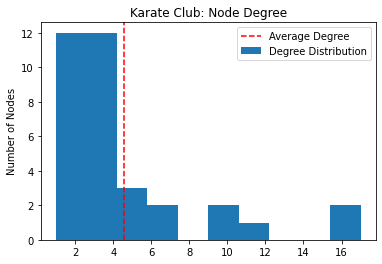

In [7]:
#we now plot the degree distribution to get a better insight
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')

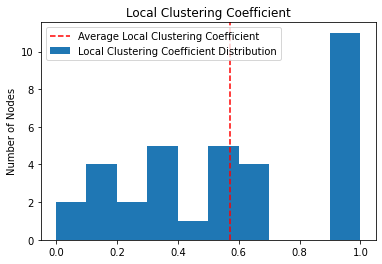

In [8]:
#Now we can compute the local clustering coefficient
local_clustering_coefficient = nx.algorithms.cluster.clustering(ZKC_graph)

#lets find the average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

#similarly to the degree lets plot the local clustering coefficient distribution
plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

In [9]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

#preform the community detection
c = list(greedy_modularity_communities(ZKC_graph))

#Let's find out how many communities we detected
print(len(c))

3


In [10]:
#Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


TypeError: ignored

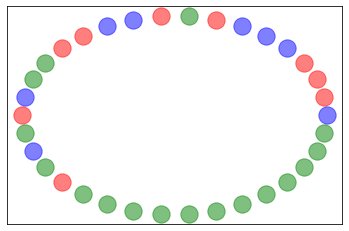

In [16]:
#draw each set of nodes in a seperate colour
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_2, node_color='b', alpha=0.5)

#now we can add edges to the drawing 
nx.draw_networkx_edges(ZKC_graph,circ_pos,stlye='dashed',width = 0.2)

#finally we can add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(ZKC_graph,circ_pos,club_labels,font_size=9)

plt.show()

In [1]:
combined_community = community_1 + community_2

#draw the network as before
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=combined_community, node_color='m', alpha=0.5)

nx.draw_networkx_edges(ZKC_graph, circ_pos,stlye='dashed',width = 0.5)

nx.draw_networkx_labels(ZKC_graph, circ_pos, club_labels, font_size=9)

plt.show()

NameError: ignored